<a href="https://colab.research.google.com/github/UvRoxx/CollabNotebooks/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
df = pd.read_csv("QueryResults-2.csv")
df

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
2070,2021-01-01 00:00:00,php,5930
2071,2021-01-01 00:00:00,ruby,599
2072,2021-01-01 00:00:00,go,618
2073,2021-01-01 00:00:00,perl,146


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [8]:
df.head()

df.tail()

,m,TagName,Unnamed: 2
2070,2021-01-01 00:00:00,php,5930
2071,2021-01-01 00:00:00,ruby,599
2072,2021-01-01 00:00:00,go,618
2073,2021-01-01 00:00:00,perl,146
2074,2021-01-01 00:00:00,swift,2835


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [9]:
df.shape

(2075, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [13]:
df.count()

m             2075
TagName       2075
Unnamed: 2    2075
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [15]:
df.groupby("TagName").sum()

,Unnamed: 2
TagName,
assembly,36718
c,350099
c#,1458044
c++,709458
delphi,47317
go,51173
java,1745780
javascript,2156697
perl,65373


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [17]:
df.groupby("TagName").count()

,m,Unnamed: 2
TagName,,
assembly,150,150
c,150,150
c#,151,151
c++,150,150
delphi,150,150
go,135,135
java,150,150
javascript,150,150
perl,150,150


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [24]:
date = df["m"][1]

In [25]:
type(date)

str

In [31]:
df['m']=pd.to_datetime(df['m'])
df


,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
2070,2021-01-01,php,5930
2071,2021-01-01,ruby,599
2072,2021-01-01,go,618
2073,2021-01-01,perl,146


## Data Manipulation



In [97]:
df.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [172]:
reshaped_df = df.pivot(index="m",columns="TagName",values="Unnamed: 2")
reshaped_df.fillna(0,inplace=True)
reshaped_df.columns

  


assembly
c
c#
c++
delphi
go
java
javascript
perl
php
python
r
ruby
swift


In [134]:
reshaped_df.shape

(151, 14)

In [156]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [157]:
reshaped_df.fillna(0,inplace=True)
reshaped_df.head

<bound method NDFrame.head of TagName     assembly       c      c#     c++  ...   python       r   ruby   swift
m                                             ...                                
2008-07-01       0.0     0.0     3.0     0.0  ...      0.0     0.0    0.0     0.0
2008-08-01       8.0    85.0   510.0   164.0  ...    124.0     0.0   72.0     0.0
2008-09-01      28.0   320.0  1649.0   754.0  ...    541.0     6.0  289.0     0.0
2008-10-01      15.0   303.0  1990.0   811.0  ...    510.0     0.0  249.0     0.0
2008-11-01      17.0   259.0  1732.0   734.0  ...    452.0     1.0  160.0     0.0
...              ...     ...     ...     ...  ...      ...     ...    ...     ...
2020-09-01     307.0  2288.0  7311.0  4248.0  ...  25157.0  5377.0  572.0  3024.0
2020-10-01     386.0  2531.0  7056.0  4762.0  ...  26571.0  5790.0  551.0  2765.0
2020-11-01     415.0  2914.0  6852.0  4783.0  ...  26139.0  5611.0  587.0  2635.0
2020-12-01     319.0  2809.0  6572.0  4893.0  ...  25826.0  4974.0  

(0.0, 35000.0)

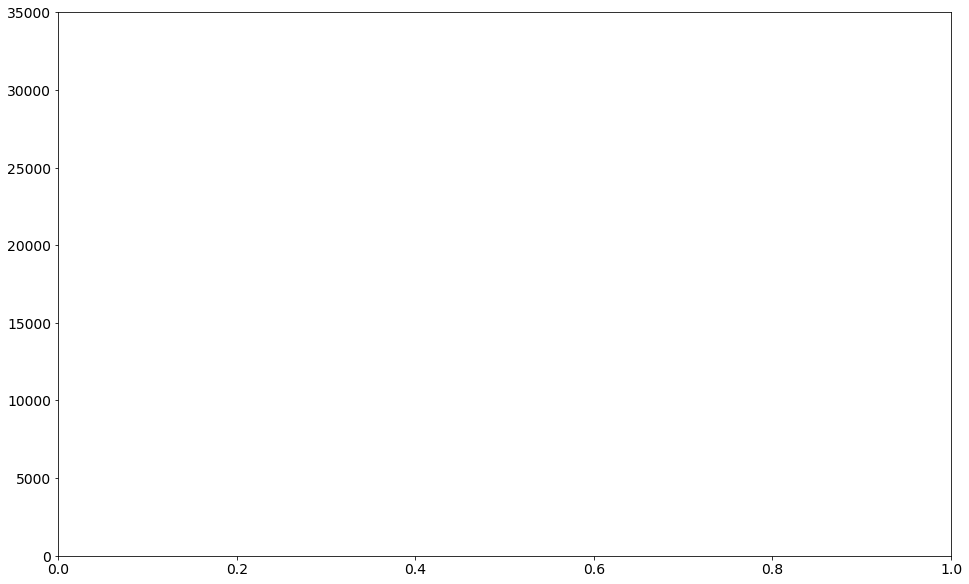

In [171]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0,35000)


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 